## 2.小麦とチェス盤問題

曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていきます。

>If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?

Wheat and chessboard problem - Wikipedia（最終閲覧日：2019年5月31日）

8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

## 3.少ないマスで考える
まずは4マスの板に小麦の粒を並べていくことを考えます。配列（リスト）の1つの要素を1つのマスに見立てています。
Pythonのリストとfor文を使い次のように作ることができます。

《サンプルコード》

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [2]:
import numpy as np
%precision 3

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


## 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。

サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [3]:
small_board_ndarray_2 = small_board_ndarray.reshape(2, 2)
print("2×2マスの板に小麦を並べる：\n{}".format(small_board_ndarray_2))

2×2マスの板に小麦を並べる：
[[1 2]
 [4 8]]


## 4.8×8マスのチェス盤
【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [4]:
def make_matrix(m, n):  # m：行数、n：列数
    num = m * n  # 並べる小麦の合計数
        
    board_list = [1]
    for i in range(num-1):
        board_list.append(board_list[-1]*2)
    board_ndarray = np.array(board_list).reshape(m, n)
    
    return board_ndarray

print("※確認用\n4×4マスの板に小麦を並べる：\n{}\n".format(make_matrix(4,4)))
print("※確認用\n6×6マスの板に小麦を並べる：\n{}\n".format(make_matrix(6,6)))

# 8*8の小麦の数表示
board_ndarray_88 = make_matrix(8, 8)
print("8×8マスの板に小麦を並べる：\n{}\n".format(board_ndarray_88))

※確認用
4×4マスの板に小麦を並べる：
[[    1     2     4     8]
 [   16    32    64   128]
 [  256   512  1024  2048]
 [ 4096  8192 16384 32768]]

※確認用
6×6マスの板に小麦を並べる：
[[          1           2           4           8          16          32]
 [         64         128         256         512        1024        2048]
 [       4096        8192       16384       32768       65536      131072]
 [     262144      524288     1048576     2097152     4194304     8388608]
 [   16777216    33554432    67108864   134217728   268435456   536870912]
 [ 1073741824  2147483648  4294967296  8589934592 17179869184 34359738368]]

8×8マスの板に小麦を並べる：
[[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
  1.280e+02]
 [2.560e+02 5.120e+02 1.024e+03 2.048e+03 4.096e+03 8.192e+03 1.638e+04
  3.277e+04]
 [6.554e+04 1.311e+05 2.621e+05 5.243e+05 1.049e+06 2.097e+06 4.194e+06
  8.389e+06]
 [1.678e+07 3.355e+07 6.711e+07 1.342e+08 2.684e+08 5.369e+08 1.074e+09
  2.147e+09]
 [4.295e+09 8.590e+09 1.718e+10 3.436e+1

## 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

棒グラフはサンプルコードを用意しています
《棒グラフのサンプルコード》

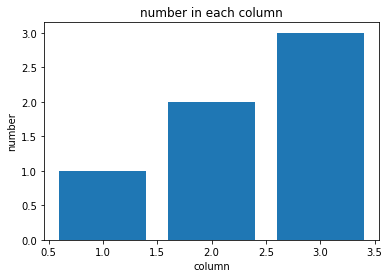

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.show()

小麦の数の合計：1.8446744073709552e+19

各行の平均：[3.188e+01 8.160e+03 2.089e+06 5.348e+08 1.369e+11 3.505e+13 8.972e+15
 2.297e+18]



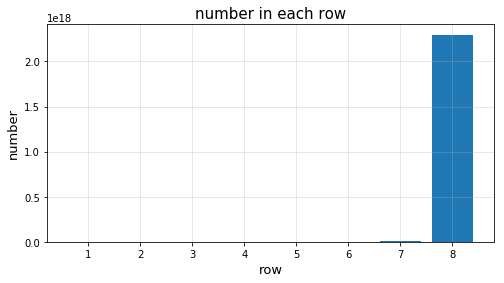

In [6]:
# 小麦の数の合計
total = board_ndarray_88.sum()
print("小麦の数の合計：{:,}\n".format(total))

# 各行の平均
board_ndarray_88_mean = board_ndarray_88.mean(axis=1)
print("各行の平均：{}\n".format(board_ndarray_88_mean))


# 各行の平均の棒グラフ
plt.figure(figsize=(8, 4))
plt.xlabel("row", fontsize=13.0)
plt.ylabel("number", fontsize=13.0)
plt.title("number in each row", fontsize=15.0)
plt.bar(
    np.arange(1, board_ndarray_88_mean.shape[0] + 1), 
    board_ndarray_88_mean, 
    align='center',
    width=0.8
    )

plt.grid(True, linewidth=1.0, alpha=0.3)
plt.show()


## 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。
ヒートマップはサンプルコードを用意しています。

《ヒートマップのサンプルコード》
4行2列の配列のヒートマップです。値が小さいところが紫、大きいところが黄色になっています。

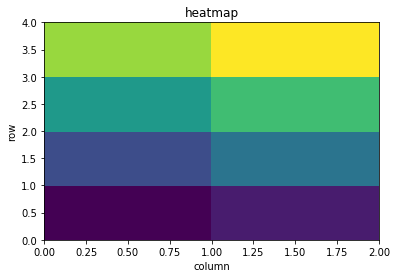

In [7]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()

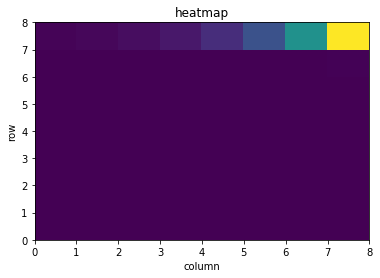

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01,
        6.400e+01, 1.280e+02],
       [2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03, 4.096e+03, 8.192e+03,
        1.638e+04, 3.277e+04],
       [6.554e+04, 1.311e+05, 2.621e+05, 5.243e+05, 1.049e+06, 2.097e+06,
        4.194e+06, 8.389e+06],
       [1.678e+07, 3.355e+07, 6.711e+07, 1.342e+08, 2.684e+08, 5.369e+08,
        1.074e+09, 2.147e+09],
       [4.295e+09, 8.590e+09, 1.718e+10, 3.436e+10, 6.872e+10, 1.374e+11,
        2.749e+11, 5.498e+11],
       [1.100e+12, 2.199e+12, 4.398e+12, 8.796e+12, 1.759e+13, 3.518e+13,
        7.037e+13, 1.407e+14],
       [2.815e+14, 5.629e+14, 1.126e+15, 2.252e+15, 4.504e+15, 9.007e+15,
        1.801e+16, 3.603e+16],
       [7.206e+16, 1.441e+17, 2.882e+17, 5.765e+17, 1.153e+18, 2.306e+18,
        4.612e+18, 9.223e+18]])

In [8]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_ndarray_88)
plt.show()

board_ndarray_88

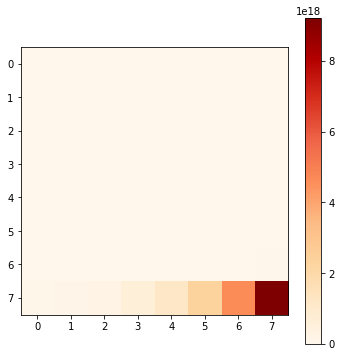

In [9]:
# 個人メモ　別タイプのヒートマップ
plt.figure(figsize=(6, 6))
plt.imshow(board_ndarray_88, cmap="OrRd")
plt.colorbar()

## 5.チェス盤の後半
アメリカの発明家レイ・カーツワイルはこの逸話を引用し、「チェス盤の後半」というフレーズを作りました。技術の進歩ははじめの内は社会に対して目立った影響が感じられなくとも、倍に倍にと進んでいくと、チェス盤の後半にさしかかったころから、急激な変化を起こすということを伝えています。

## 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [10]:
part_1 = board_ndarray_88[0:3, :].sum()
part_2 = board_ndarray_88[4:8, :].sum()

print("前半の合計値：{}\n".format(part_1))
print("後半の合計値：{}\n".format(part_2))

ratio = round(part_2 / part_1)
print("後半は前半の {:,}倍\n".format(ratio))

前半の合計値：16777215.0

後半の合計値：1.8446744069414584e+19

後半は前半の 1,099,511,693,056.0倍



## 6.他の計算方法
はじめのサンプルコードではPythonのリストとfor文を使っていましたが、他の方法も考えられます。
ndarrayのnp.append()とfor文を使うと次のように作ることができます。

《サンプルコード（np.append()）》

In [11]:
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


ブロードキャストを活用することで、次のようにも作ることができます。

《サンプルコード（ブロードキャスト）》

In [12]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


## ndarrayの型
なお、これらの方法で64マスの小麦の数を調べたい場合、型の問題が出てきます。

In [13]:
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


In [14]:
n_squares = 64
indices_of_squares = np.arange(n_squares)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：0


最後の64マス目が-9223372036854775808と負の数になり明らかに間違っています。このndarrayの型を見ると、次のように int64 です。

In [15]:
print(board_ndarray.dtype) # int64

int32


int64は64ビットの整数型で、-9,223,372,036,854,775,808 ~ 9,223,372,036,854,775,807 の範囲の整数値しか扱えないことを示しています。この値は -2の64乗から2の64乗-1 です。そのため、2の64乗になる64マス目の値が範囲外となり、負の値として出てきてしまっているのです。


Pythonの整数型（int）にはこのような制限がありませんが、ndarrayは高速な計算が行える反面、こういった制約があり、型で扱える範囲を意識しておく必要があります。


今回は正の値しか利用しないため、 uint64 を使用することで解決します。 0 ~ 18,446,744,073,709,551,615 を扱うことができます。astypeメソッドを使うことで型を変換できるので、累乗の計算前にこれを使いndarrayをuint64型にしておきます。

In [16]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808

最後のマスの小麦の数：9223372036854775808


## 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。


それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [17]:
# 「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」
# np.append()を使用したパターン
def make_matrix02(m, n):
    num = m * n
    board_ndarray = np.array([1]).astype(np.uint64)  # 型変換。ここで変換しておかないとループ処理後値が欠落する
    print("forループ前 dtype：{}".format(board_ndarray.dtype))  # forループ前 dtype：uint64
    for i in range(num-1):
        board_ndarray = np.append(board_ndarray, board_ndarray[-1]*2)
    print("forループ後 dtype：{}".format(board_ndarray.dtype))  # forループ後 dtype：float64
    board_ndarray = board_ndarray.reshape(m, n).astype(np.uint64) # 再度型変換
    return board_ndarray

data01 = make_matrix02(8, 8)
print(data01.dtype)
print(data01)

forループ前 dtype：uint64
forループ後 dtype：float64
uint64
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      351843

In [18]:
# 上記処理からprint関数を削除（最後の%%timeitテスト用の関数）
def make_matrix02_02(m, n):
    num = m * n
    board_ndarray = np.array([1]).astype(np.uint64)
    for i in range(num-1):
        board_ndarray = np.append(board_ndarray, board_ndarray[-1]*2)
    board_ndarray = board_ndarray.reshape(m, n).astype(np.uint64)
    return board_ndarray

In [19]:
# ブロードキャストを使用したパターン

def make_matrix03(m, n):
    num = m * n
    board_ndarray = 2 ** np.arange(num).reshape(m, n).astype(np.uint64)
    return board_ndarray

data02 = make_matrix03(8, 8)
print(data02.dtype)
print(data02)

uint64
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     14073748

## 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。


%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。


《%%timeitの例》

In [20]:
%%timeit
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = a + b

5.86 µs ± 693 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%%timeit
# パターン1
make_matrix(8,8)

36.7 µs ± 3.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%%timeit
# パターン2
make_matrix02_02(8,8)

892 µs ± 86.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%%timeit
# パターン3
make_matrix03(8,8)

11.2 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
# 比較用に1パターン追加（ブロードキャストではなく、forループで2の累乗を計算するパターン）
# パターン4
def make_matrix04(m, n):  # m：行数、n：列数
    num = m * n  # 並べる小麦の合計数
    board_ndarray = np.array([2**i for i in range(num)]).reshape(n, m)
    return board_ndarray

In [25]:
%%timeit
# パターン4
make_matrix04(8,8)

68.7 µs ± 7.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## テスト結果への考察
パターン1(forループ、リストのappend使用、board_list[-1]\*2で計算)<br>
　→シンプルな記述パターンのため、この所要時間を基準に他と比較する。

パターン2(forループ、numpyのappend使用、board_list[-1]\*2で計算)<br>
　→型変換を複数回行っているためかと思ったが、型変換の記述を無くしてみても早くならなかった。※下記追加テストも参照<br>
　　処理内容は基本的にパターン1と同様であるため、実はnumpyのappendは遅いのではないかと考える。

パターン3(ブロードキャスト計算)<br>
　→最も早い。numpyは累乗計算の処理も高速に終わる様子。<br>
　　標準偏差も唯一ns(ナノ秒)単位となっており、安定して高速に処理ができている。

パターン4(for内包表記、append不使用、パターン3同様に2の累乗で計算)<br>
　→1行で書けてスマートだが、パターン1より遅い。2の累乗計算をforで繰り返すのには時間がかかる様子。<br>
　　numpyの処理速度とは明らかに異なる。

## 結論
以上より、基本的にnumpyのappendの繰り返し処理は避けた方が良い。<br>
appendを繰り返し実行しなければならない場合は、通常のリストを作成し最後にnumpyに変換した方が良い。<br>
演算処理に関しては可能な限りnumpyで行った方が良いが、型に注意。

## 追加テスト
※自己学習メモ（せっかくの機会なのでもういくつかのパターンでテストしてみた。）

In [26]:
# パターン2の処理から型変換処理を削除。
def make_matrix02_03(m, n):
    num = m * n
    board_ndarray = np.array([1])
    for i in range(num-1):
        board_ndarray = np.append(board_ndarray, board_ndarray[-1]*2)
    board_ndarray = board_ndarray.reshape(m, n)
    return board_ndarray

In [27]:
#パターン4との比較用の処理。
# パターン4との違いは、後からnp.array(List)で変換する点。
def make_matrix05(m, n):  # m：行数、n：列数
    num = m * n  # 並べる小麦の合計数
    board_ndarray = [2**i for i in range(num)]
    board_ndarray = np.array(board_ndarray).reshape(m, n)
    return board_ndarray

# パターン4との違いは、内包表記をやめてforループでappendしている点。
def make_matrix06(m, n):  # m：行数、n：列数
    num = m * n  # 並べる小麦の合計数
    board_ndarray = []
    for i in range(num):
        board_ndarray.append(2**i)
    board_ndarray = np.array(board_ndarray).reshape(m, n)
    return board_ndarray

In [28]:
%%timeit
# パターン2（型変換なしバージョン） 型と値のスケールが合っていないため余計に時間を要している。
make_matrix02_03(8,8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


845 µs ± 46.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%%timeit
# パターン2（4*4に減らしてみる）
make_matrix02_02(4,4)

307 µs ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%%timeit
# パターン2（4*4に減らして、型変換なし）
make_matrix02_03(4,4)

246 µs ± 40.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit
# パターン5
make_matrix05(8,8)

67.3 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
%%timeit
# パターン6
make_matrix06(8,8)

80.8 µs ± 7.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 追加テストからの考察
パターン4～6の比較では、パターン6が最も遅いため、appendを繰り返し実行するよりは、内包表記で一気にリスト化した方がやや速い。<br>
パターン4・5には大きな違いは見られなかった。
